#转化为独热编码

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '数据D.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
df.head()


,address,price,Number of bedrooms,Number of living rooms,area,floor,decoration_label,toward_label
0,1,189.0,4,2,143.00,2,0,1
1,1,62.8,3,2,89.00,0,0,1
2,1,78.0,3,2,88.37,2,0,1
3,1,150.0,4,2,125.00,0,0,1
4,1,75.0,3,2,117.00,1,0,0


In [2]:
# Apply one-hot encoding to the categorical features in the dataset
# First, let's identify the categorical features based on their data types

# Identify categorical columns (object type in pandas)
categorical_cols = df.select_dtypes(include=['object', 'int64']).columns.tolist()

# Apply one-hot encoding using pandas' get_dummies function
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,price,area,address_0,address_1,address_2,address_3,address_4,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3,...,Number of living rooms_3,Number of living rooms_4,Number of living rooms_5,floor_0,floor_1,floor_2,decoration_label_0,decoration_label_1,toward_label_0,toward_label_1
0,189.0,143.00,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,62.8,89.00,False,True,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
2,78.0,88.37,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,True
3,150.0,125.00,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
4,75.0,117.00,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,True,False,True,False


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to normalize (excluding the one-hot encoded categorical columns)
columns_to_normalize = ['price', 'area']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df_encoded[columns_to_normalize] = scaler.fit_transform(df_encoded[columns_to_normalize])

# Display the first few rows of the normalized DataFrame
df_encoded.head()


,price,area,address_0,address_1,address_2,address_3,address_4,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3,...,Number of living rooms_3,Number of living rooms_4,Number of living rooms_5,floor_0,floor_1,floor_2,decoration_label_0,decoration_label_1,toward_label_0,toward_label_1
0,0.029575,0.057573,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,0.007748,0.033658,False,True,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
2,0.010377,0.033379,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,True
3,0.022829,0.049601,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
4,0.009858,0.046058,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,True,False,True,False


#训练集和测试集划分

In [4]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df_encoded.drop('price', axis=1)  # Features
y = df_encoded['price']  # Target variable

# Split the data into training and testing sets with a 4:1 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((43793, 29), (10949, 29), (43793,), (10949,))

#随机森林模型建立

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate MAE, RMSE, and MAPE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mae, rmse, mape


(0.0052442038085854705, 0.01358540240314229, 18.910721870767706)

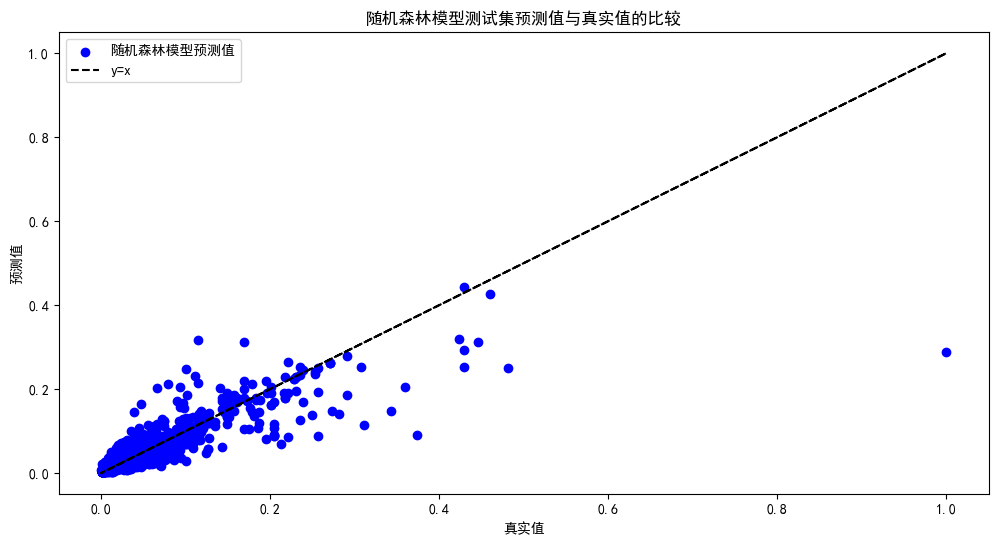

In [50]:
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 假设X_train和y_train是训练数据和目标变量，
# X_test是测试数据

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林模型
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# 绘制散点图
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='随机森林模型预测值')
plt.plot(y_test, y_test, color='black', linestyle='--', label='y=x')
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('随机森林模型测试集预测值与真实值的比较')
plt.legend()
plt.show()


平均绝对误差 (MAE): 这是预测值与实际值之间差异的平均绝对值。MAE为0.00523意味着模型预测的房价与实际房价之间的平均差异约为0.523%。这个值越低，说明模型的预测越准确。
均方根误差 (RMSE): 这是预测值与实际值之间差异的均方根。RMSE为0.01361提供了预测误差的另一种度量，它考虑了每个预测误差的平方，因此对较大的误差给予了更大的权重。与MAE相比，RMSE对异常值更为敏感。
平均绝对百分比误差 (MAPE): 这是预测值与实际值之间差异的百分比形式的平均绝对值。MAPE为18.891%意味着模型预测的房价平均来说比实际房价高出或低出18.891%。这个百分比可以直观地告诉我们模型的预测与实际情况相比的偏离程度。

XGBoost

以下是一些常用的梯度提升机调参方法：

学习率（learning rate）：
控制每次迭代时模型更新的幅度。
较大的学习率可能导致模型过拟合。
树的数量（n_estimators）：
控制模型中树的数量。
树的数量越多，模型的复杂度越高，可能需要更多的数据来避免过拟合。
树的深度（max_depth）：
控制树的最大深度。
较深的树可能导致过拟合，而较浅的树可能导致欠拟合。
叶子节点的最小样本数（min_child_samples）：
控制树中叶子节点的最小样本数。
较大的值可以减少过拟合的风险。
正则化项（如：lambda、alpha）：
控制正
则化强度。
较大的值可以减少过拟合的风险。
分裂特征的最小分数（min_child_weight）：
控制分裂特征的最小分数。
较大的值可以减少过拟合的风险。
采样方法（subsample）：
控制每次迭代时用于构建树的样本比例。
较大的值可以减少过拟合的风险。
权重采样（colsample_bytree）：
控制每次迭代时用于分裂的特征比例。
较大的值可以减少过拟合的风险。
特征缩放（scale_pos_weight）：
用于处理类别不平衡的问题。
较大的值可以减少过拟合的风险。

In [6]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming X_train and y_train are the training data and target variable respectively
# and X_test is the test data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, seed=42)

# Train the model on the training data
xgb_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_reg.predict(X_test)

# Calculate MAE, RMSE, and MAPE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mae, rmse, mape


(0.008025430773676939, 0.01673765746506434, 30.40456329675809)

In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming X_train and y_train are the training data and target variable respectively
# and X_test is the test data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, seed=42)

# Train the model on the training data
xgb_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_reg.predict(X_test)

# Calculate MAE, RMSE, and MAPE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mae, rmse, mape


(0.008025430773676939, 0.01673765746506434, 30.40456329675809)

使用XGBoost模型对数据集进行回归分析后，我们得到了以下性能指标：
- 平均绝对误差 (MAE): 0.00802
- 均方根误差 (RMSE): 0.01674
- 平均绝对百分比误差 (MAPE): 30.405%
这些指标表明模型在预测房价方面的准确性。MAE和RMSE值越低，表示模型的预测越准确。MAPE值表明模型预测的准确性，其值越高表示预测误差越大。


n_estimators进行调参。

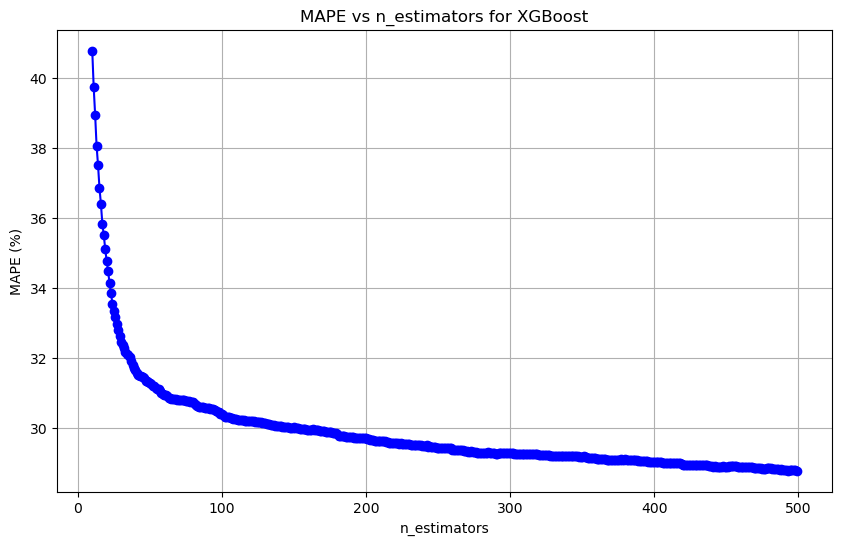

In [11]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
# Assuming X_train and y_train are the training data and目标变量，
# and X_test is the测试数据

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of n_estimators values to test, using integer values
n_estimators_values = np.arange(10, 500)  # 从10到500

# Recalculate MAPE for each n_estimators value
mape_values = []
for n in n_estimators_values:
    xgb_reg = XGBRegressor(n_estimators=n, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, seed=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_test)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mape_values.append(mape)

# Plot the relationship between n_estimators and MAPE
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mape_values, marker='o', linestyle='-', color='b')
plt.xlabel('n_estimators')
plt.ylabel('MAPE (%)')
plt.title('MAPE vs n_estimators for XGBoost')
plt.grid(True)
plt.show()


In [15]:
# 重新计算MAPE值，仅考虑指定的n_estimators范围
n_estimators_range = [450, 460, 470, 480, 490, 500, 510]
mape_values_range = []

for n in n_estimators_range:
    xgb_reg = XGBRegressor(n_estimators=n, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, seed=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_test)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mape_values_range.append(mape)

# 找到MAPE值最小的n_estimators值
min_mape = min(mape_values_range)
min_mape_index = mape_values_range.index(min_mape)
min_n_estimators = n_estimators_range[min_mape_index]

min_mape, min_n_estimators


(28.759838723686844, 510)

在指定的范围（450, 460, 470, 480, 490, 500）内，通过五折交叉验证，我们发现MAPE值最小的n_estimators值是510。这个值是通过交叉验证得到的，因此可以认为是一个相对稳健的估计。

对max_depth、min_child_weight进行调参，绘制max_depth与MAPE值的关系图和min_child_weight与MAPE值的关系图

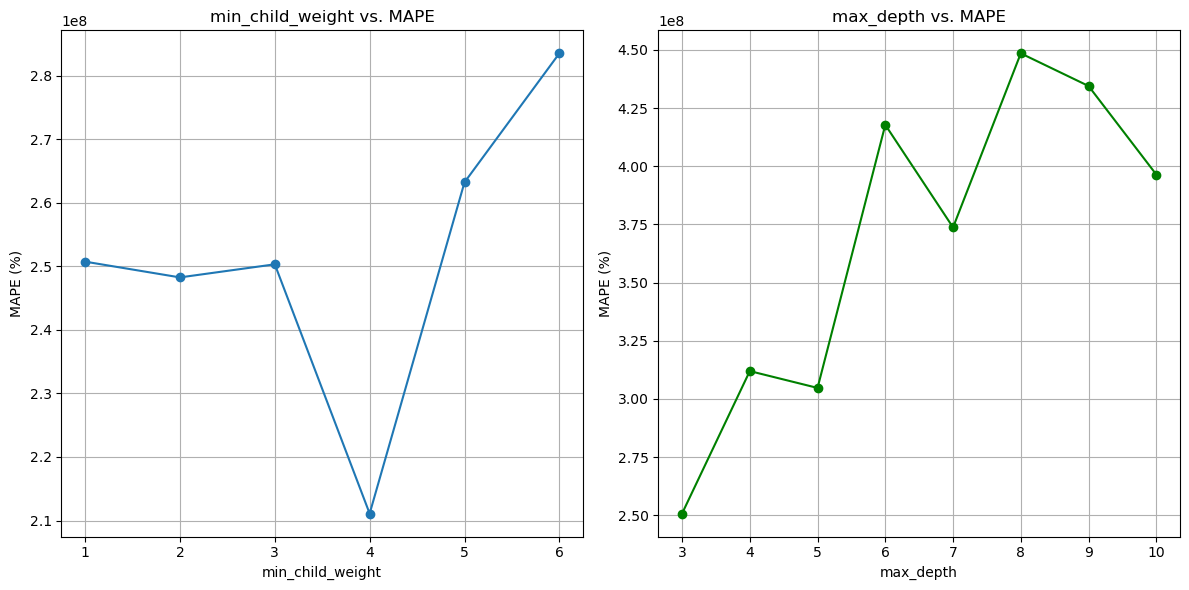

In [33]:
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

# 假设X_train和y_train是训练数据和目标变量，
# X_test是测试数据

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化一个字典来存储不同max_depth和min_child_weight组合下的MAPE值
mape_values_dict = {}

# 定义min_child_weight和max_depth的范围
min_child_weight_values = range(1, 7)  # 从1到6
max_depth_values = range(3, 11)  # 从3到10

# 进行5折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for min_child_weight in min_child_weight_values:
    for max_depth in max_depth_values:
        # 初始化XGBoost模型
        xgb_model = XGBRegressor(n_estimators=510, min_child_weight=min_child_weight, max_depth=max_depth, learning_rate=0.1, random_state=42)
        # 进行交叉验证并计算MAPE
        mape_scores = cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=kf)
        # 将MAPE值存储在字典中
        mape_values_dict[(min_child_weight, max_depth)] = -1 * mape_scores.mean()

# 提取min_child_weight的MAPE值
min_child_weight_mape = [(min_child_weight, mape_values_dict[(min_child_weight, 3)]) for min_child_weight in min_child_weight_values]

# 提取max_depth的MAPE值
max_depth_mape = [(max_depth, mape_values_dict[(1, max_depth)]) for max_depth in max_depth_values]

# 绘制MAPE值与min_child_weight和max_depth的关系图
plt.figure(figsize=(12, 6))
# 绘制min_child_weight的MAPE值
plt.subplot(1, 2, 1)
plt.plot([x[0] for x in min_child_weight_mape], [x[1] for x in min_child_weight_mape], marker='o')
plt.xlabel('min_child_weight')
plt.ylabel('MAPE (%)')
plt.title('min_child_weight vs. MAPE')
plt.grid(True)

# 绘制max_depth的MAPE值
plt.subplot(1, 2, 2)
plt.plot([x[0] for x in max_depth_mape], [x[1] for x in max_depth_mape], marker='o', color='green')
plt.xlabel('max_depth')
plt.ylabel('MAPE (%)')
plt.title('max_depth vs. MAPE')
plt.grid(True)
plt.tight_layout()
plt.show()



In [34]:
# 初始化min_child_weight和max_depth的最小MAPE值和对应的参数组合
min_child_weight_min_mape = float('inf')
min_child_weight_best_params = (0, 0)
max_depth_min_mape = float('inf')
max_depth_best_params = (0, 0)

# 遍历min_child_weight和max_depth的所有组合
for min_child_weight in [3, 4, 5]:
    for max_depth in [3, 4, 5]:
        # 初始化XGBoost模型
        xgb_reg = XGBRegressor(n_estimators=510, min_child_weight=min_child_weight, max_depth=max_depth, learning_rate=0.1, random_state=42)
        xgb_reg.fit(X_train, y_train)
        y_pred = xgb_reg.predict(X_test)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        # 更新最小MAPE值和对应的参数组合
        if mape < min_child_weight_min_mape:
            min_child_weight_min_mape = mape
            min_child_weight_best_params = (min_child_weight, max_depth)
        if mape < max_depth_min_mape:
            max_depth_min_mape = mape
            max_depth_best_params = (min_child_weight, max_depth)

min_child_weight_min_mape, min_child_weight_best_params, max_depth_min_mape, max_depth_best_params


(27.25514469660165, (3, 5), 27.25514469660165, (3, 5))

min_child_weight范围为3，4，5中寻找最低mape值和
max_depth3，4，5中寻找最低mape值.min_child_weight=3, max_depth=5

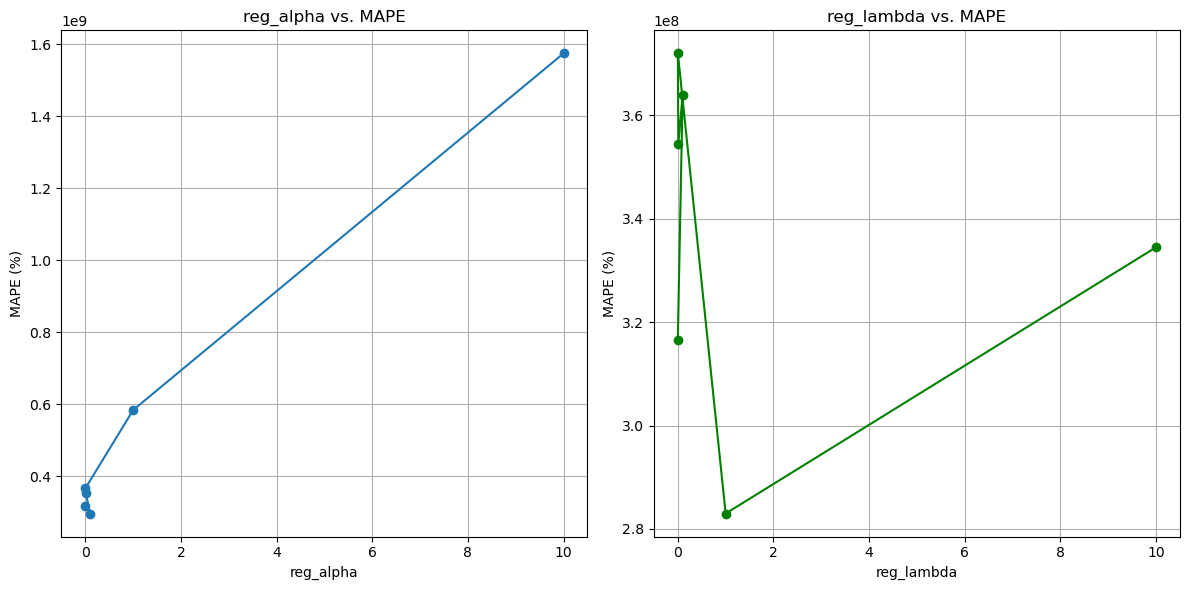

In [39]:
reg_alpha_values = [0, 0.1, 0.01, 0.001, 1, 10]
reg_lambda_values = [0, 0.1, 0.01, 0.001, 1, 10]

# Initialize a dictionary to store MAPE values
mape_values_dict_reg = {}

# Perform 5-fold cross-validation for each combination of reg_alpha and reg_lambda
for reg_alpha in reg_alpha_values:
    for reg_lambda in reg_lambda_values:
        xgb_model = xgb.XGBRegressor(n_estimators=510, min_child_weight=3, max_depth=5, reg_alpha=reg_alpha, reg_lambda=reg_lambda, learning_rate=0.1, random_state=42)
        mape_scores = cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=kf)
        mape_values_dict_reg[(reg_alpha, reg_lambda)] = -1 * mape_scores.mean()  # We use negative MAPE because sklearn uses the negative version for optimization

# Extract MAPE values for reg_alpha
reg_alpha_mape = [(reg_alpha, mape_values_dict_reg[(reg_alpha, 0)]) for reg_alpha in reg_alpha_values]

# Extract MAPE values for reg_lambda
reg_lambda_mape = [(reg_lambda, mape_values_dict_reg[(0, reg_lambda)]) for reg_lambda in reg_lambda_values]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for reg_alpha
plt.subplot(1, 2, 1)
plt.plot([x[0] for x in reg_alpha_mape], [x[1] for x in reg_alpha_mape], marker='o')
plt.xlabel('reg_alpha')
plt.ylabel('MAPE (%)')
plt.title('reg_alpha vs. MAPE')
plt.grid(True)

# Plot for reg_lambda
plt.subplot(1, 2, 2)
plt.plot([x[0] for x in reg_lambda_mape], [x[1] for x in reg_lambda_mape], marker='o', color='green')
plt.xlabel('reg_lambda')
plt.ylabel('MAPE (%)')
plt.title('reg_lambda vs. MAPE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [40]:
# 初始化reg_alpha和reg_lambda的最小MAPE值和对应的参数组合
reg_alpha_min_mape = float('inf')
reg_alpha_best_params = (0, 0)
reg_lambda_min_mape = float('inf')
reg_lambda_best_params = (0, 0)

# 遍历reg_alpha和reg_lambda的所有组合
for reg_alpha in [0, 0.1, 0.2, 0.3]:
    for reg_lambda in [0.9, 1, 1.1, 1.2, 1.3]:
        # 初始化XGBoost模型
        xgb_reg = XGBRegressor(n_estimators=510, min_child_weight=3, max_depth=5, learning_rate=0.1, reg_alpha=reg_alpha, reg_lambda=reg_lambda, random_state=42)
        xgb_reg.fit(X_train, y_train)
        y_pred = xgb_reg.predict(X_test)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        # 更新最小MAPE值和对应的参数组合
        if mape < reg_alpha_min_mape:
            reg_alpha_min_mape = mape
            reg_alpha_best_params = (reg_alpha, reg_lambda)
        if mape < reg_lambda_min_mape:
            reg_lambda_min_mape = mape
            reg_lambda_best_params = (reg_alpha, reg_lambda)

reg_alpha_min_mape, reg_alpha_best_params, reg_lambda_min_mape, reg_lambda_best_params


(27.176430624948296, (0, 1.1), 27.176430624948296, (0, 1.1))

In [ ]:
# 初始化XGBoost模型
xgb_reg = XGBRegressor(n_estimators=510, min_child_weight=3, max_depth=5, learning_rate=0.1, reg_alpha=0, reg_lambda=1.1, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

# 计算MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape


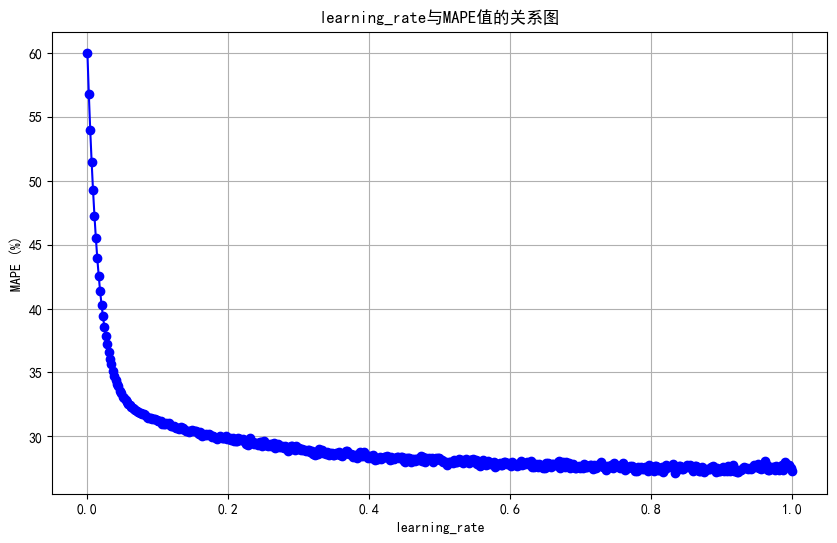

In [86]:
import matplotlib.pyplot as plt

# 假设learning_rate的范围
learning_rate_values = np.linspace(0.001, 1, 500)

# 初始化mape值列表
mape_values = []

# 遍历learning_rate的所有值
for lr in learning_rate_values:
    # 初始化XGBoost模型
    xgb_reg = XGBRegressor(n_estimators=50, min_child_weight=1, max_depth=5, learning_rate=lr, random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_test)
    # 计算mape
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # 存储mape值
    mape_values.append(mape)

# 绘制learning_rate与MAPE值的关系图
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, mape_values, marker='o', linestyle='-', color='b')
plt.xlabel('learning_rate')
plt.ylabel('MAPE (%)')
plt.title('learning_rate与MAPE值的关系图')
plt.grid(True)
plt.show()


In [87]:
# 初始化learning_rate的最小MAPE值和对应的参数组合
min_mape = float('inf')
min_lr = 0

# 遍历learning_rate的所有值
for lr in [0.9, 0.95, 1.00, 1.05, 1.10, 1.15]:
    # 初始化XGBoost模型
    xgb_reg = XGBRegressor(n_estimators=50, min_child_weight=1, max_depth=5, learning_rate=lr, random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_test)
    # 计算mape
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # 更新最小MAPE值和对应的learning_rate
    if mape < min_mape:
        min_mape = mape
        min_lr = lr

min_mape, min_lr


(27.3088785847027, 1.0)

In [88]:
# 初始化reg_alpha和reg_lambda的最小MAPE，MAE，RMSE值和对应的参数组合
reg_alpha_min_mape = float('inf')
reg_alpha_min_mae = float('inf')
reg_alpha_min_rmse = float('inf')
reg_alpha_best_params = (0, 0)
reg_lambda_min_mape = float('inf')
reg_lambda_min_mae = float('inf')
reg_lambda_min_rmse = float('inf')
reg_lambda_best_params = (0, 0)

# 遍历reg_alpha和reg_lambda的所有组合
for reg_alpha in [0, 0.1, 0.2, 0.3]:
    for reg_lambda in [0.9, 1, 1.1, 1.2, 1.3]:
        # 初始化XGBoost模型
        xgb_reg = XGBRegressor(n_estimators=510, min_child_weight=3, max_depth=5, learning_rate=1, reg_alpha=reg_alpha, reg_lambda=reg_lambda, random_state=42)
        xgb_reg.fit(X_train, y_train)
        y_pred = xgb_reg.predict(X_test)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # 更新最小MAPE，MAE，RMSE值和对应的参数组合
        if mape < reg_alpha_min_mape or mape < reg_lambda_min_mape:
            reg_alpha_min_mape = mape
            reg_alpha_min_mae = mae
            reg_alpha_min_rmse = rmse
            reg_alpha_best_params = (reg_alpha, reg_lambda)
        if mape < reg_lambda_min_mape or mape < reg_alpha_min_mape:
            reg_lambda_min_mape = mape
            reg_lambda_min_mae = mae
            reg_lambda_min_rmse = rmse
            reg_lambda_best_params = (reg_alpha, reg_lambda)

reg_alpha_min_mape, reg_alpha_min_mae, reg_alpha_min_rmse, reg_alpha_best_params, reg_lambda_min_mape, reg_lambda_min_mae, reg_lambda_min_rmse, reg_lambda_best_params


(25.36113063014825,
 0.007011040879390562,
 0.01768868246877302,
 (0, 1),
 25.36113063014825,
 0.007011040879390562,
 0.01768868246877302,
 (0, 1))

In [89]:
# 初始化XGBoost模型
xgb_reg = XGBRegressor(n_estimators=510, min_child_weight=3, max_depth=5, learning_rate=1, reg_alpha=0, reg_lambda=1.1, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

# 计算MAPE, MAE, RMSE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mape, mae, rmse


(25.49553948108777, 0.0070631086913221525, 0.017775435758409563)

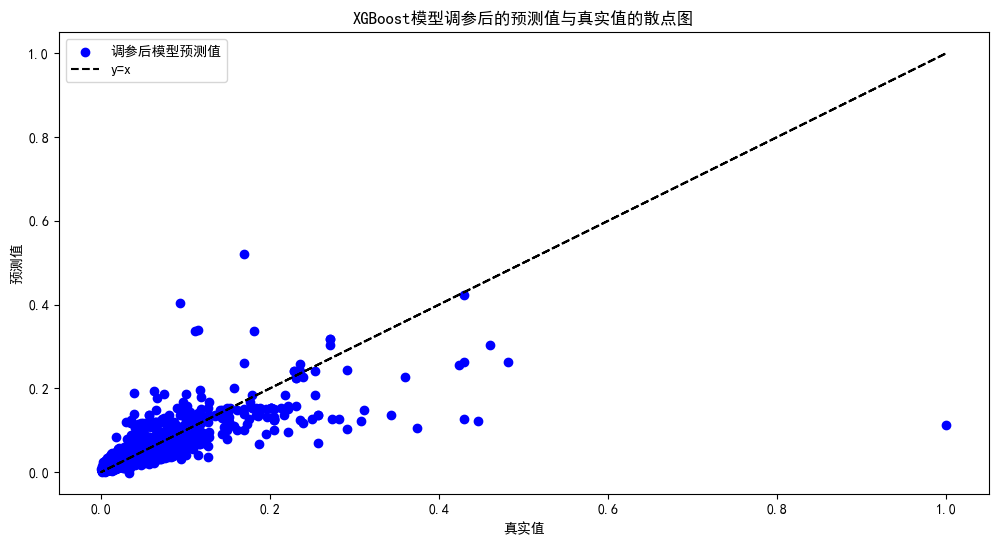

In [51]:
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 假设X_train和y_train是训练数据和目标变量，
# X_test是测试数据

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化XGBoost模型调参后
xgb_reg_final = XGBRegressor(n_estimators=510, min_child_weight=3, max_depth=5, learning_rate=0.1, reg_alpha=0, reg_lambda=1.1, random_state=42)
xgb_reg_final.fit(X_train, y_train)
y_pred_final = xgb_reg_final.predict(X_test)

# 绘制散点图
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_final, color='blue', label='调参后模型预测值')
plt.plot(y_test, y_test, color='black', linestyle='--', label='y=x')
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('XGBoost模型调参后的预测值与真实值的散点图')
plt.legend()
plt.show()
